In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('----------/diabetes.csv')

data_x= data.drop(labels=['Outcome'],axis=1,inplace=False)     
data_y=data['Outcome']   

print(data.isnull().sum())
print('/'*15)

col = data.columns

diabetes_copy  = data.copy(deep = True)

diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin',
               'BMI']] = diabetes_copy[['Glucose','BloodPressure',
                                             'SkinThickness','Insulin',
                                             'BMI']].replace(0,np.NaN)
print(diabetes_copy.isna().sum())
print('/'*15)

In [ ]:
diabetes_copy.hist(figsize=(25,25))
plt.show()

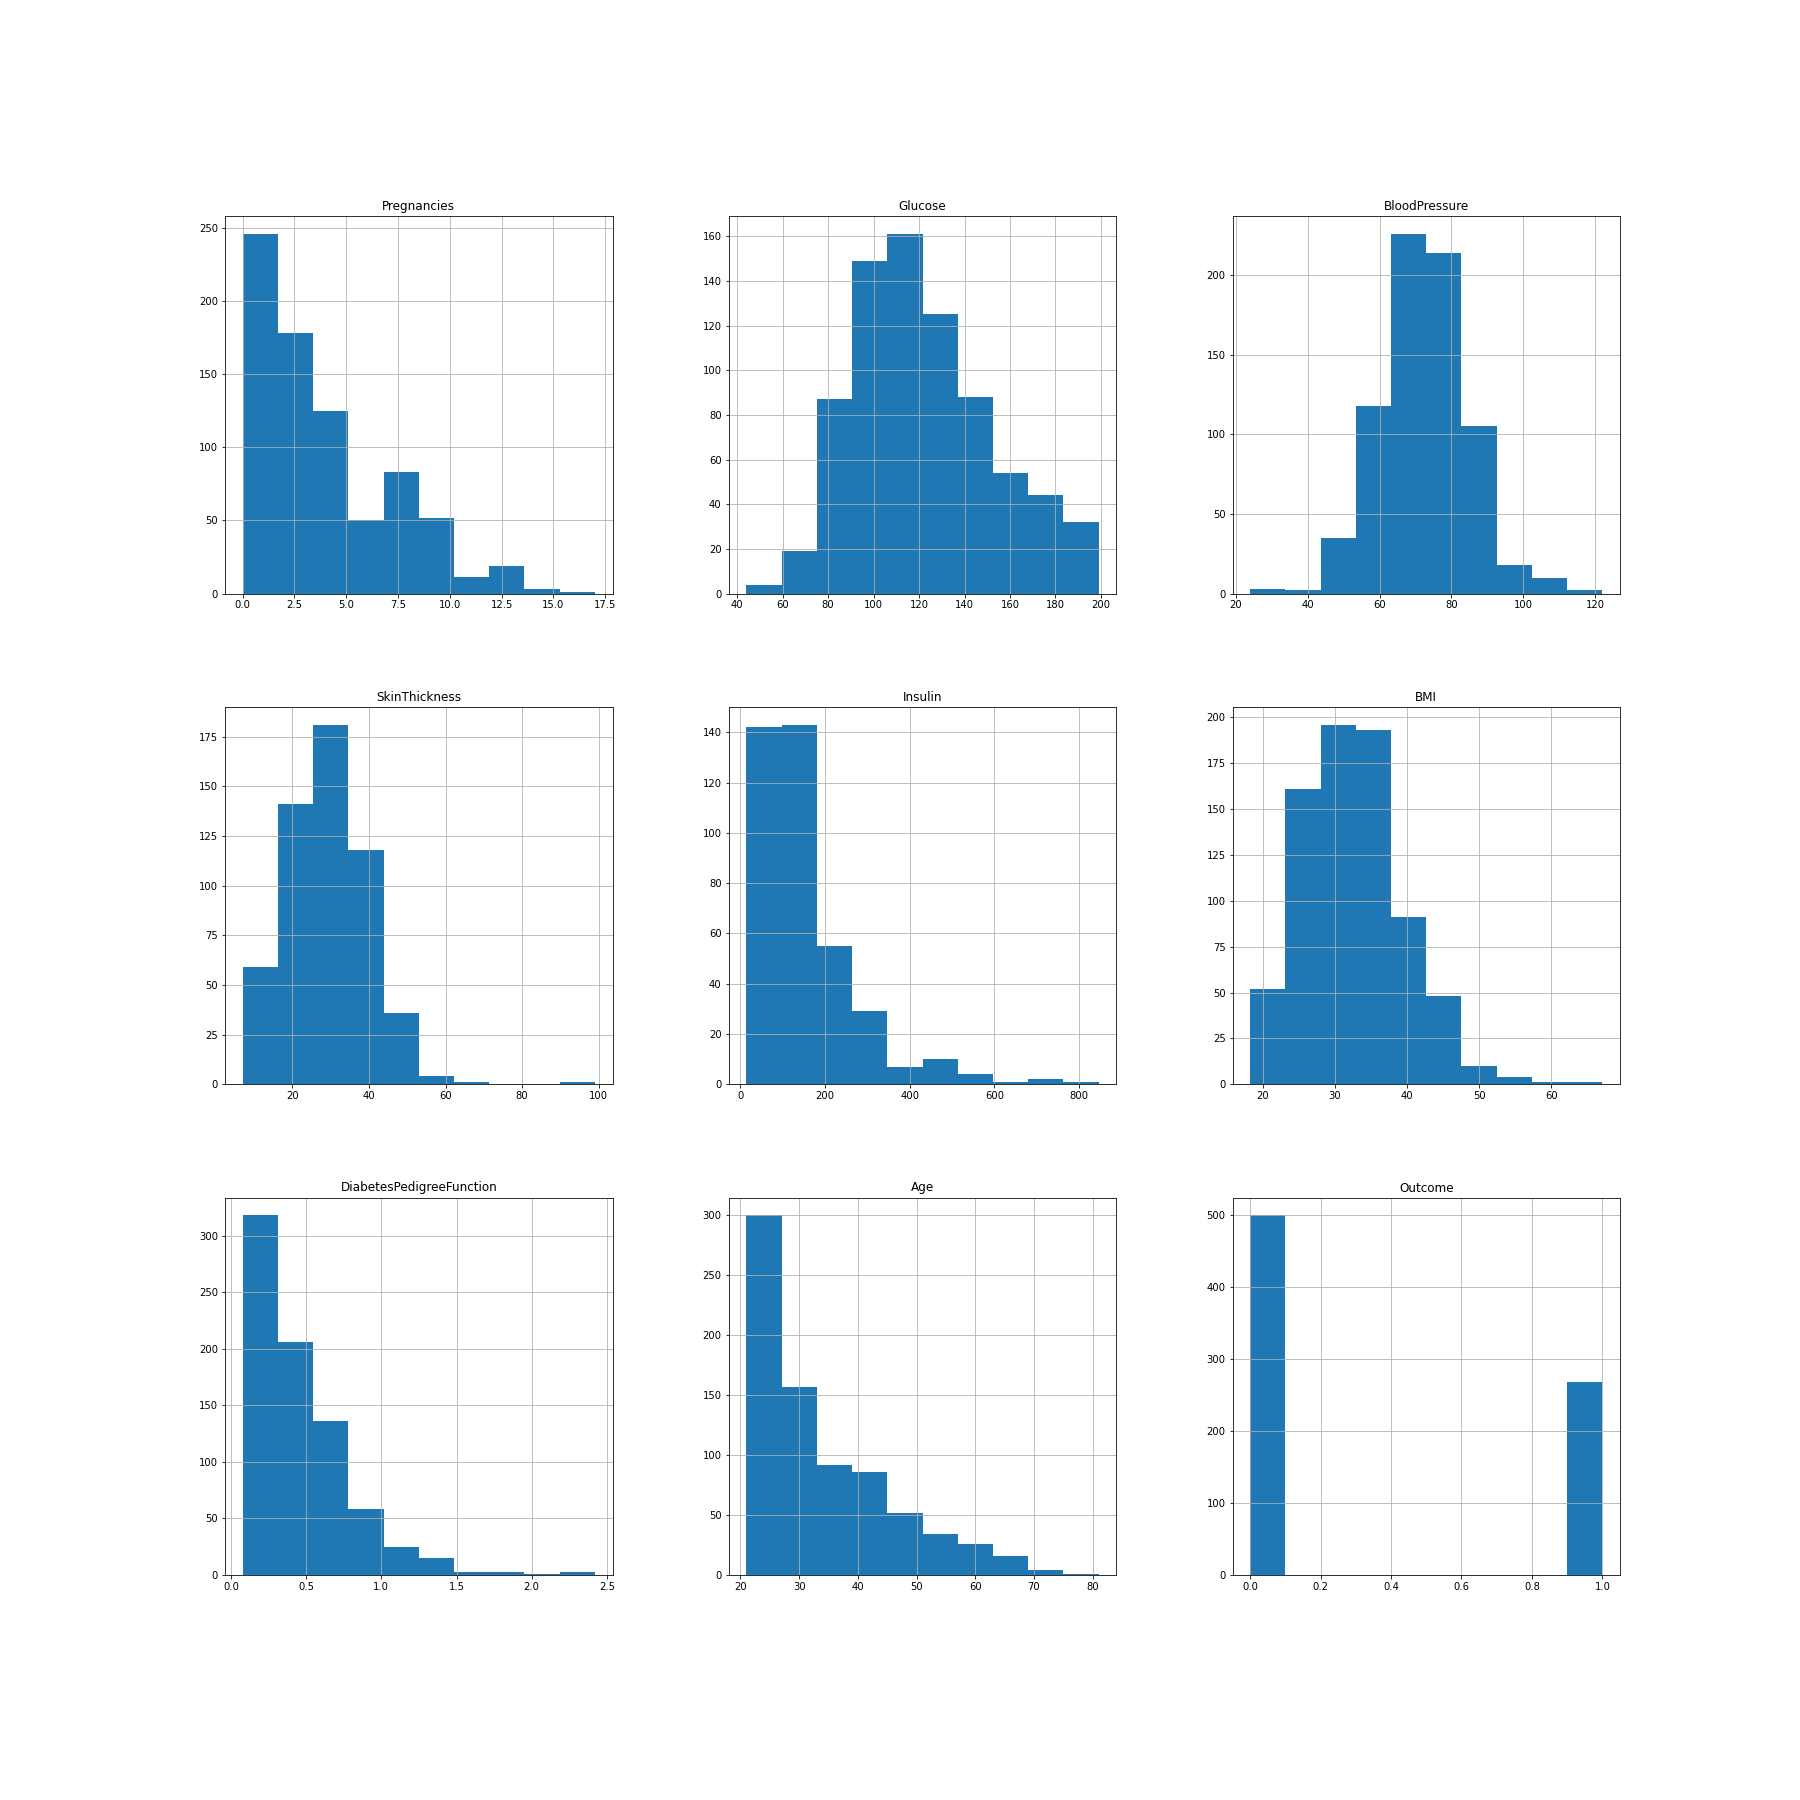

In [ ]:
violin_col = data_x.columns
    
for i in violin_col:
    figure=plt.figure(figsize=(20,15))
    sns.violinplot(x='Outcome',y=i,data=diabetes_copy)
    plt.show()

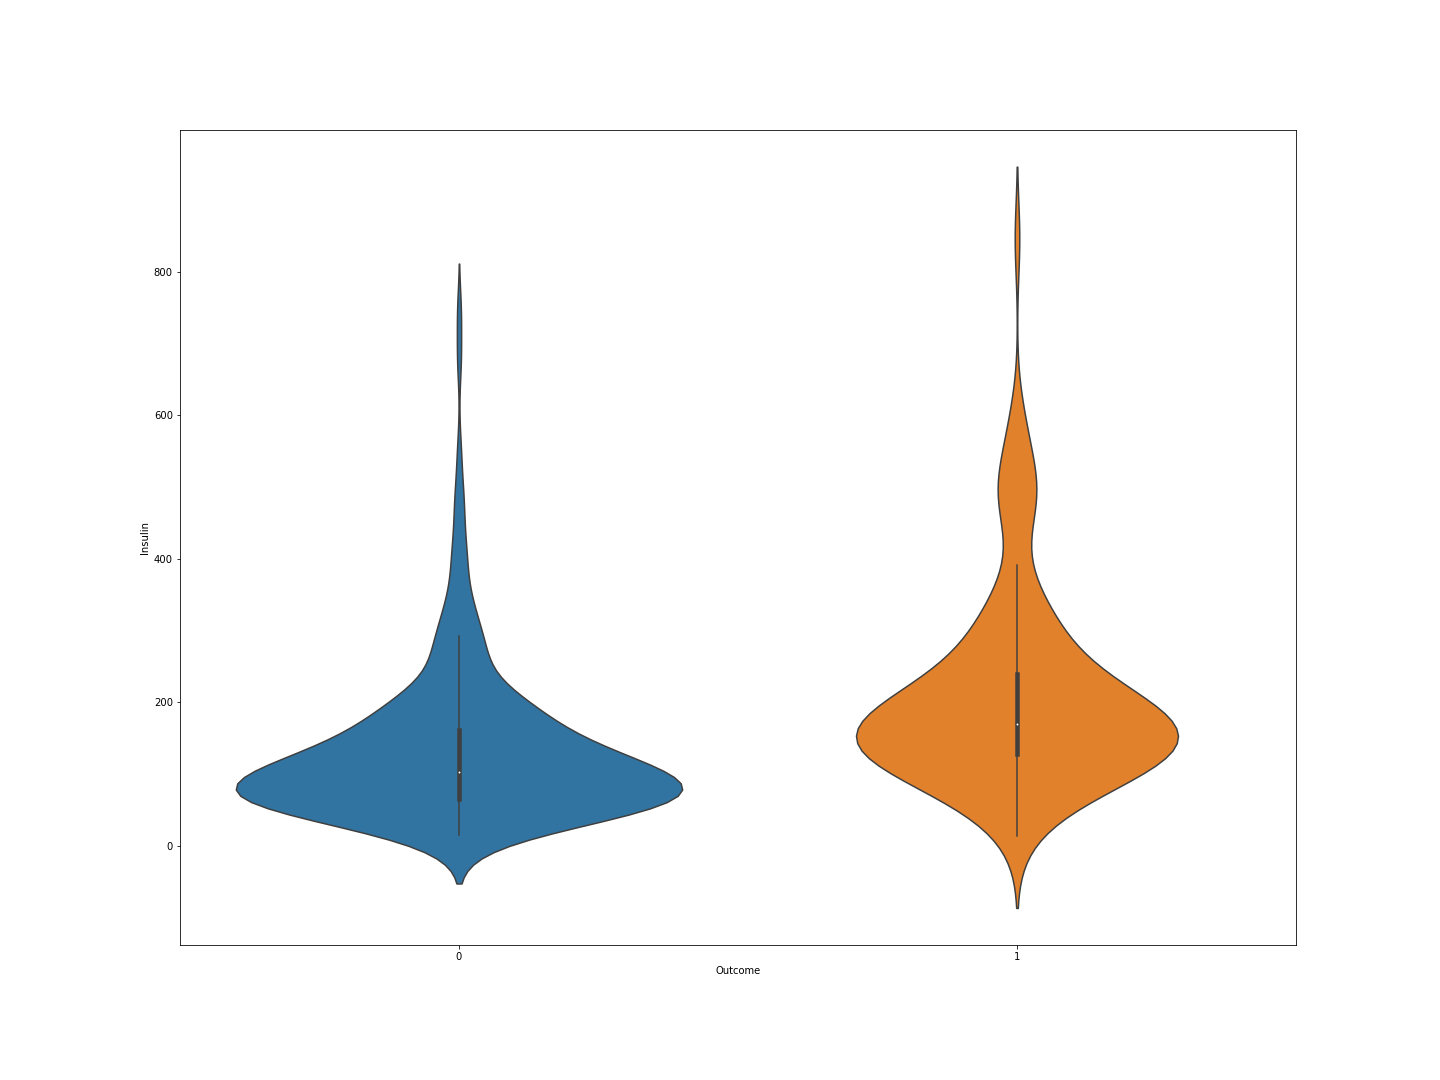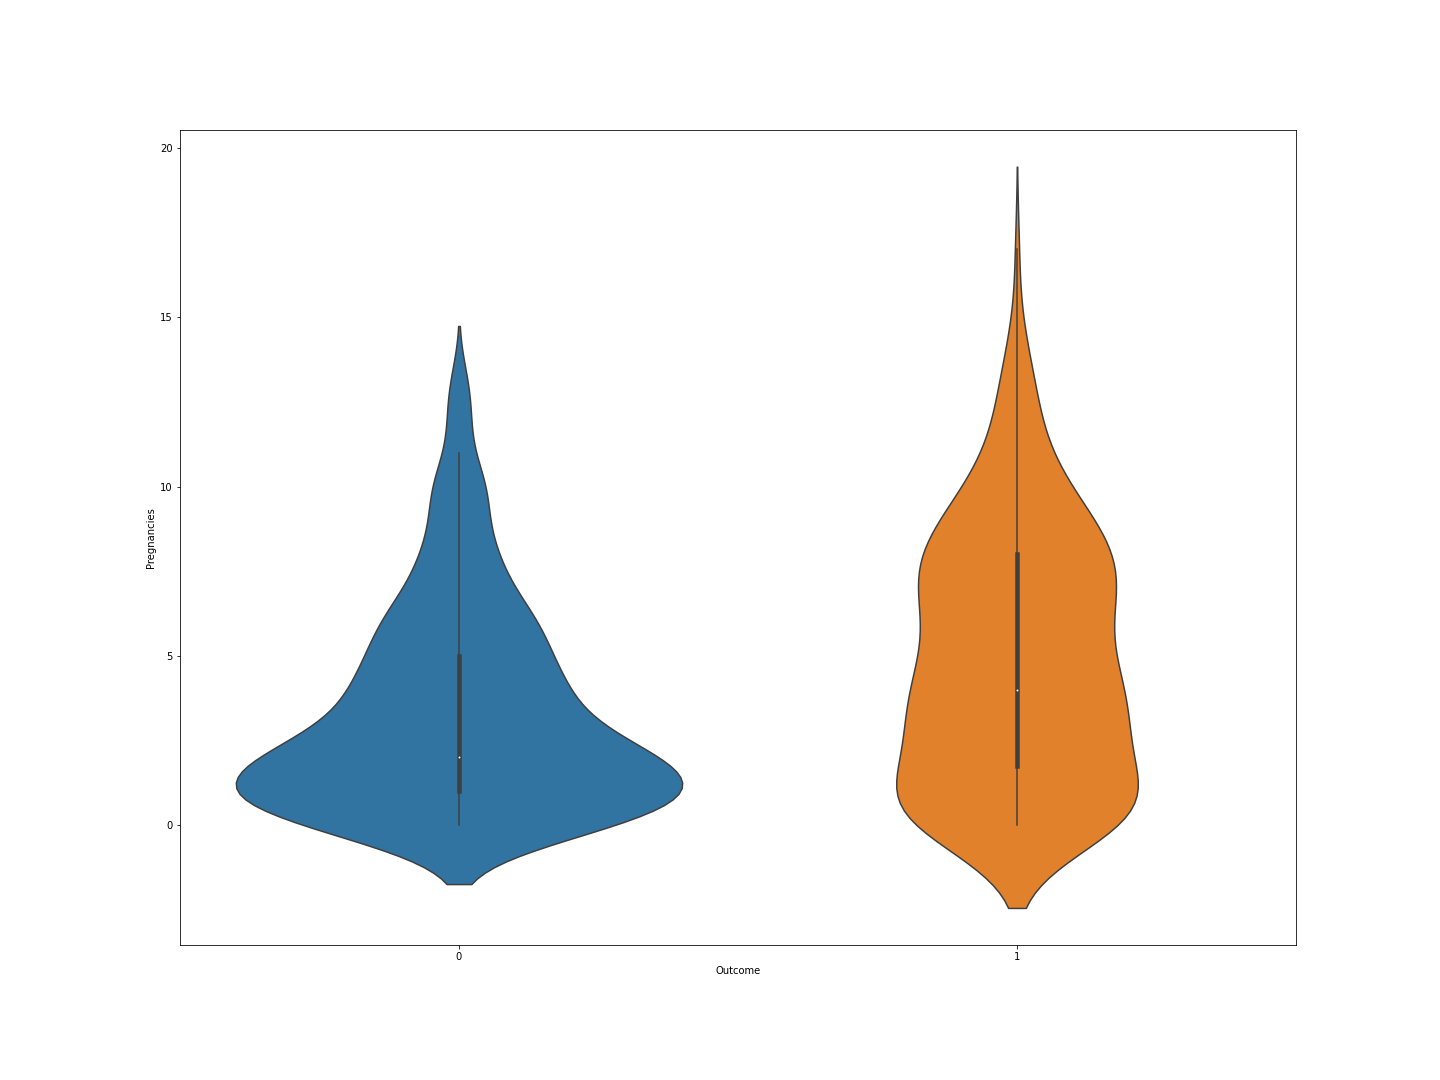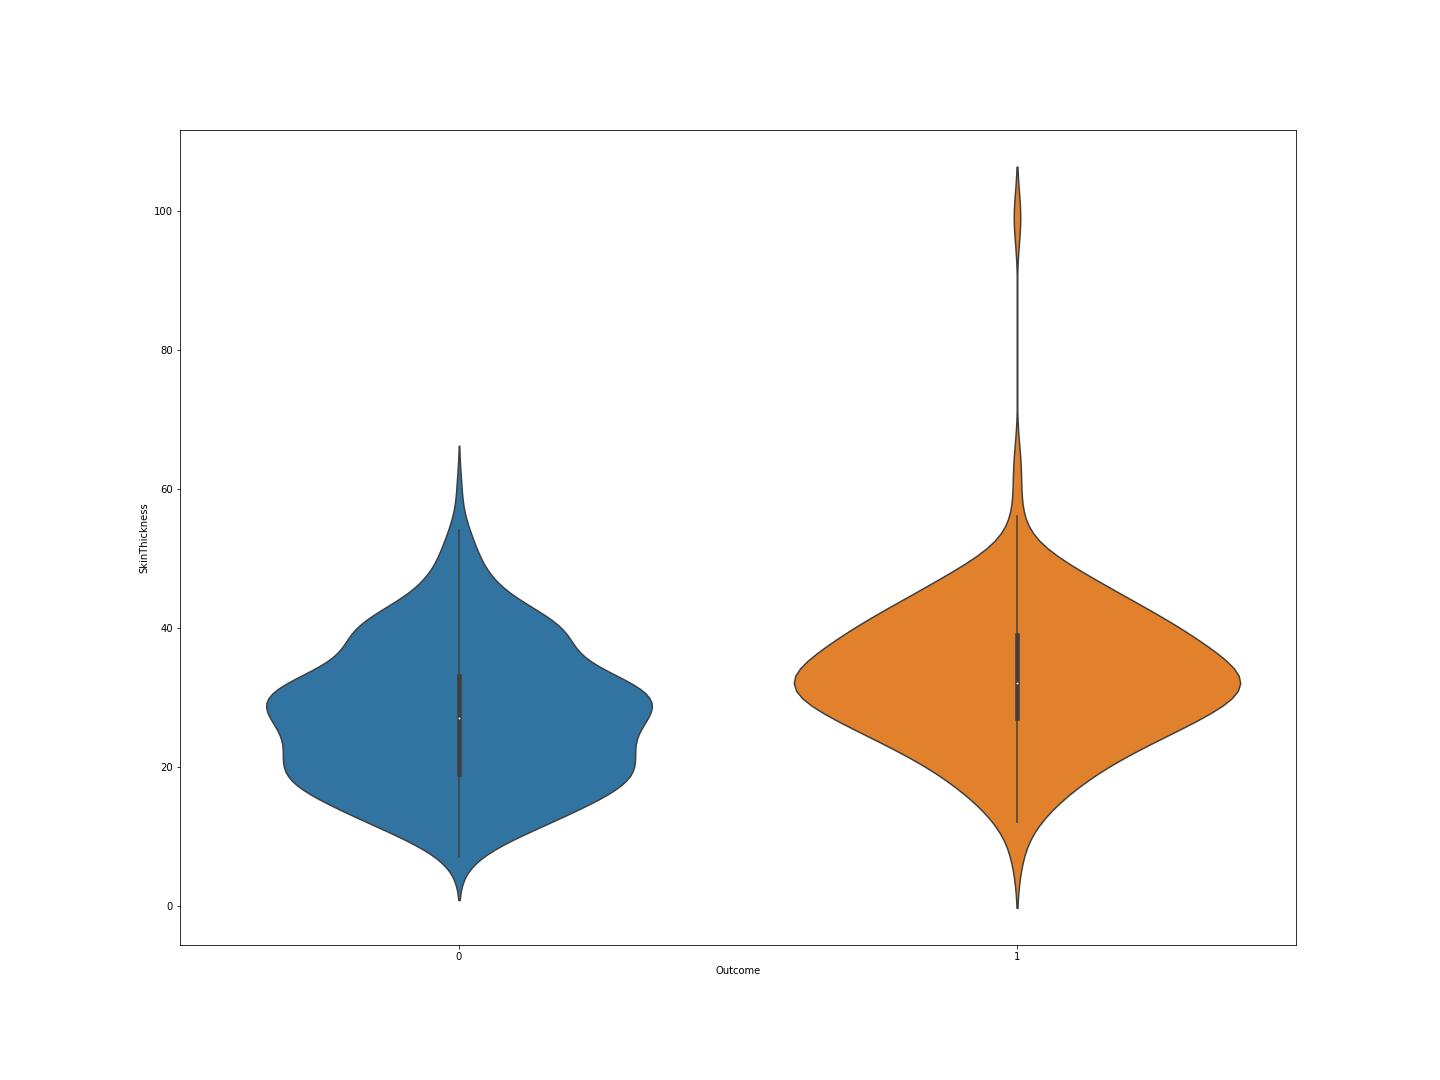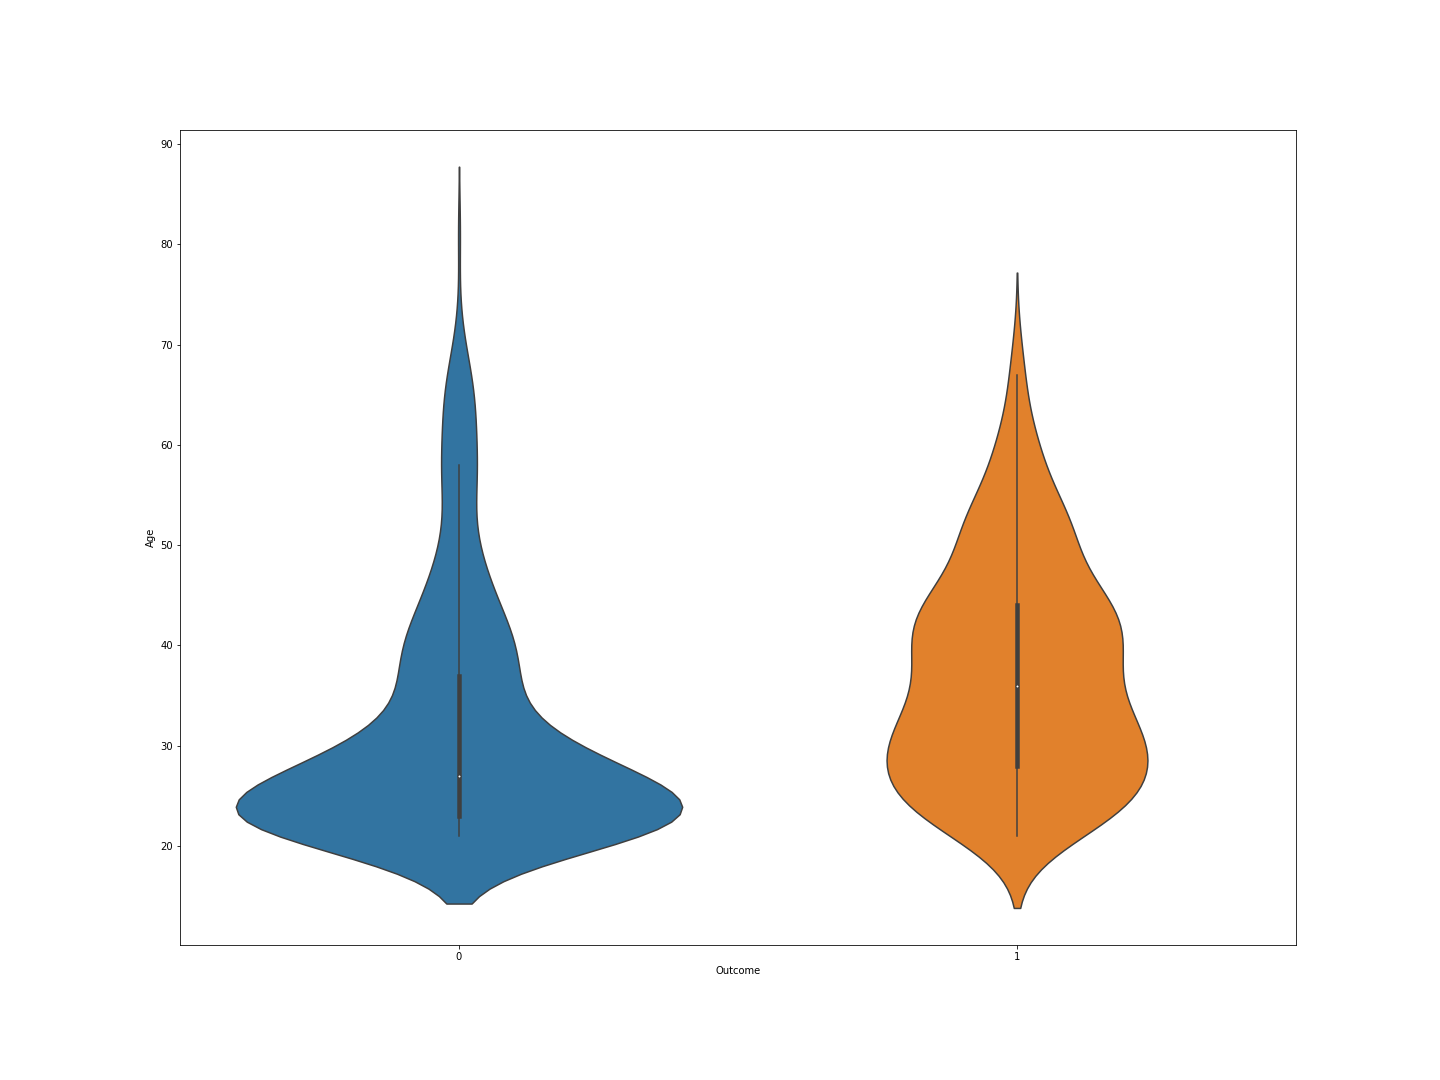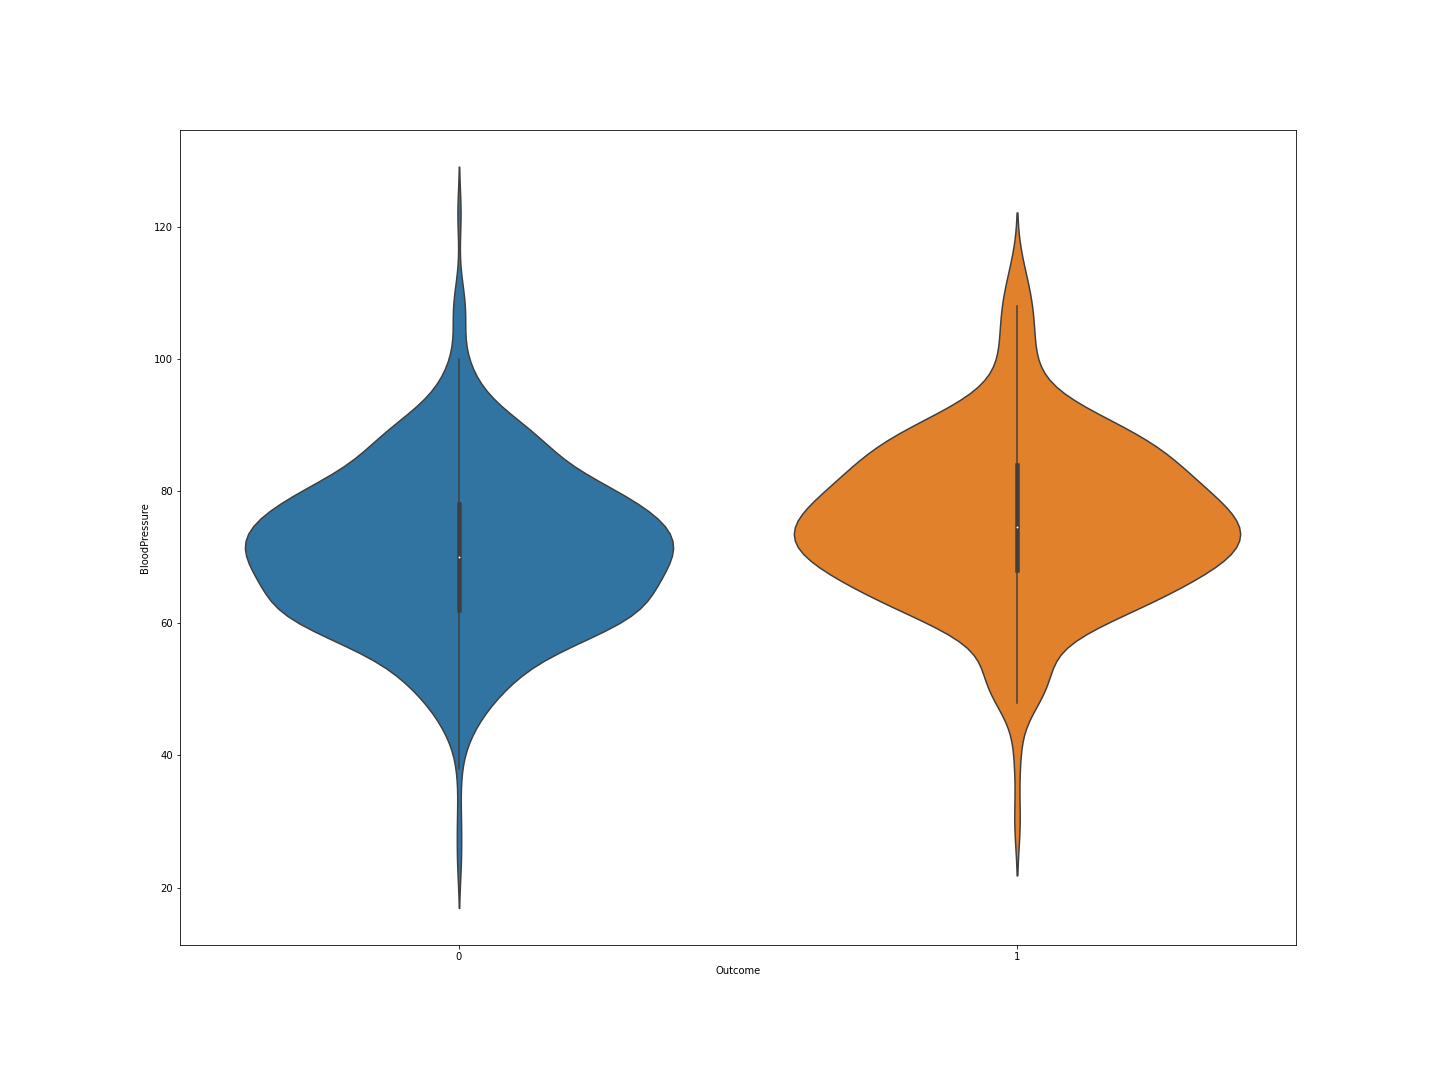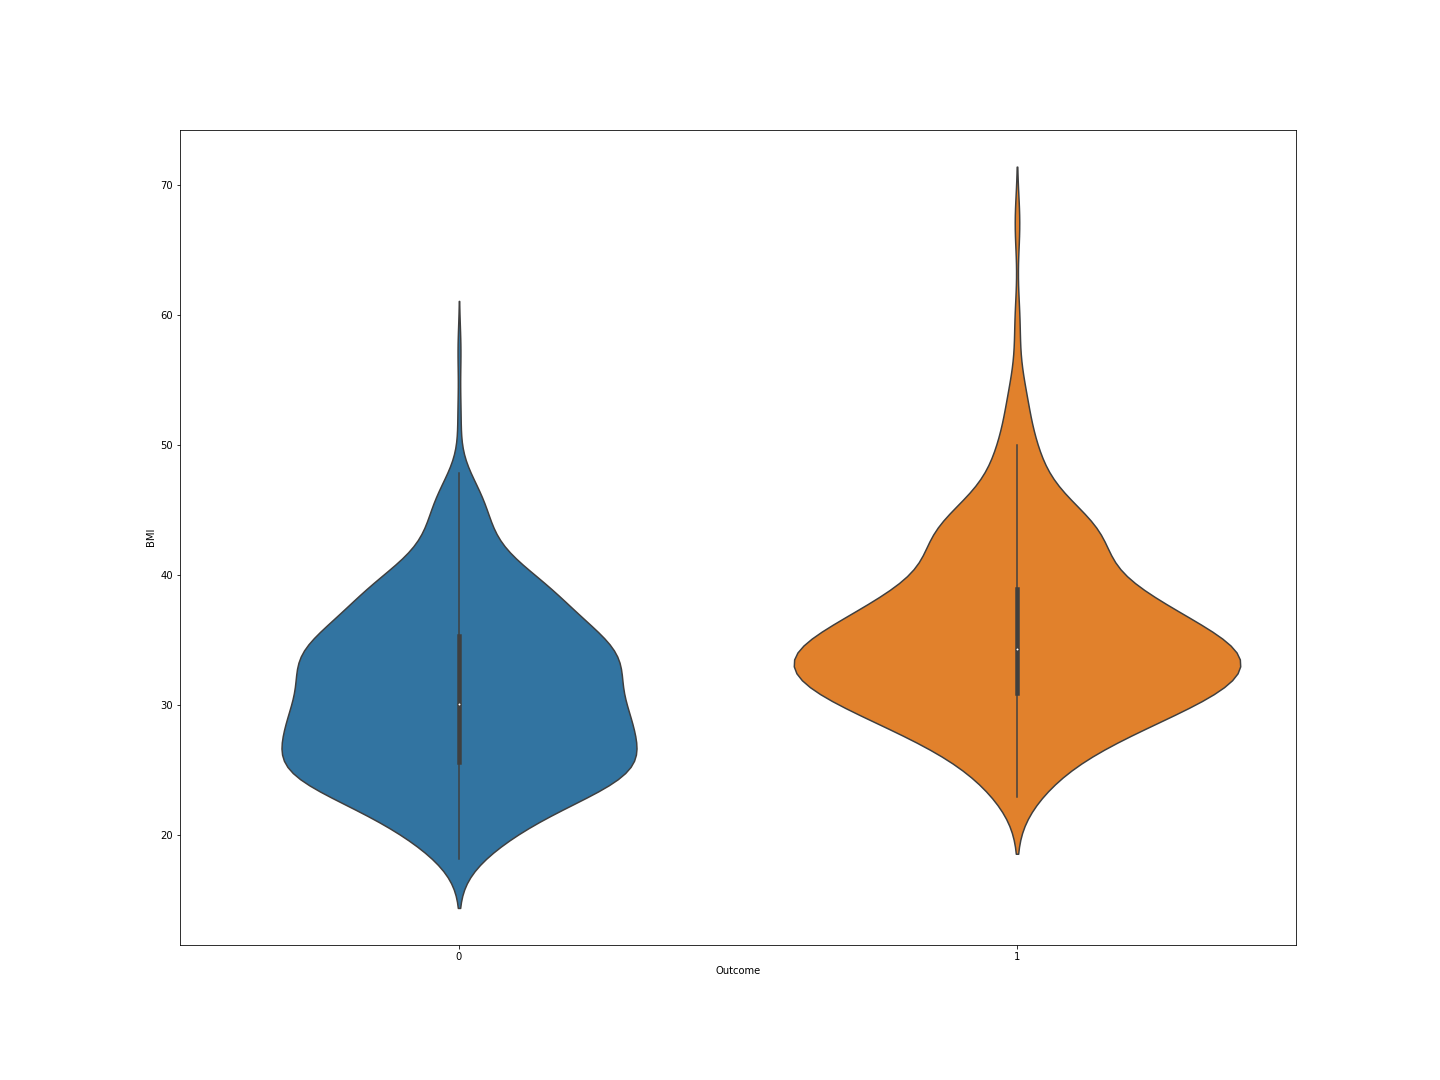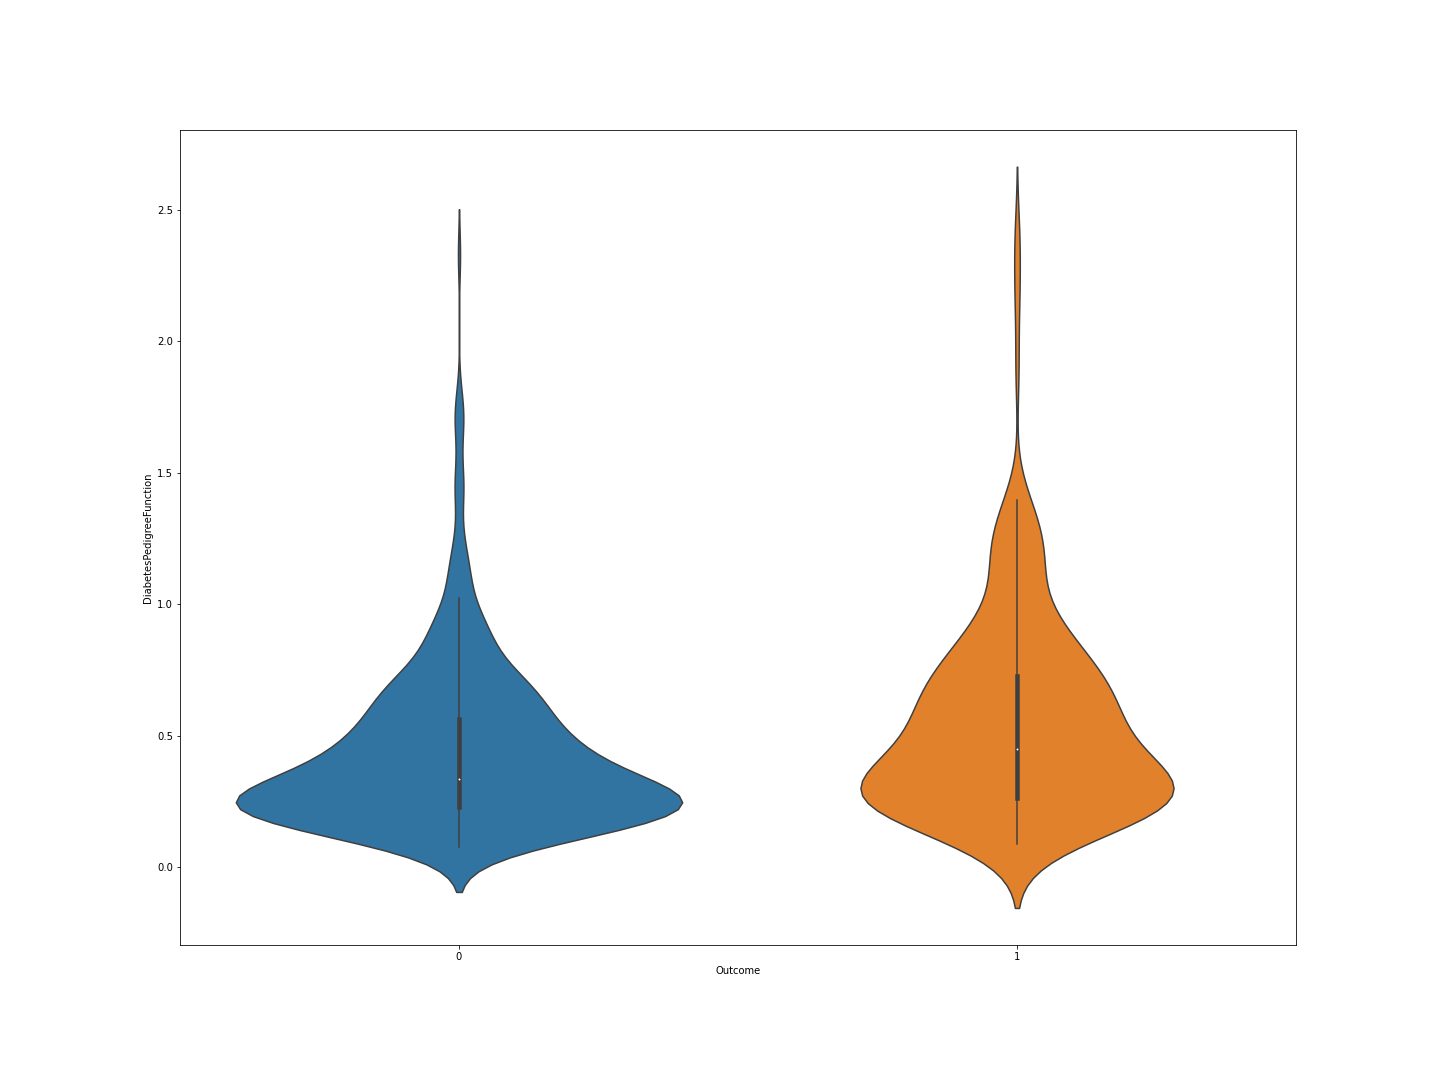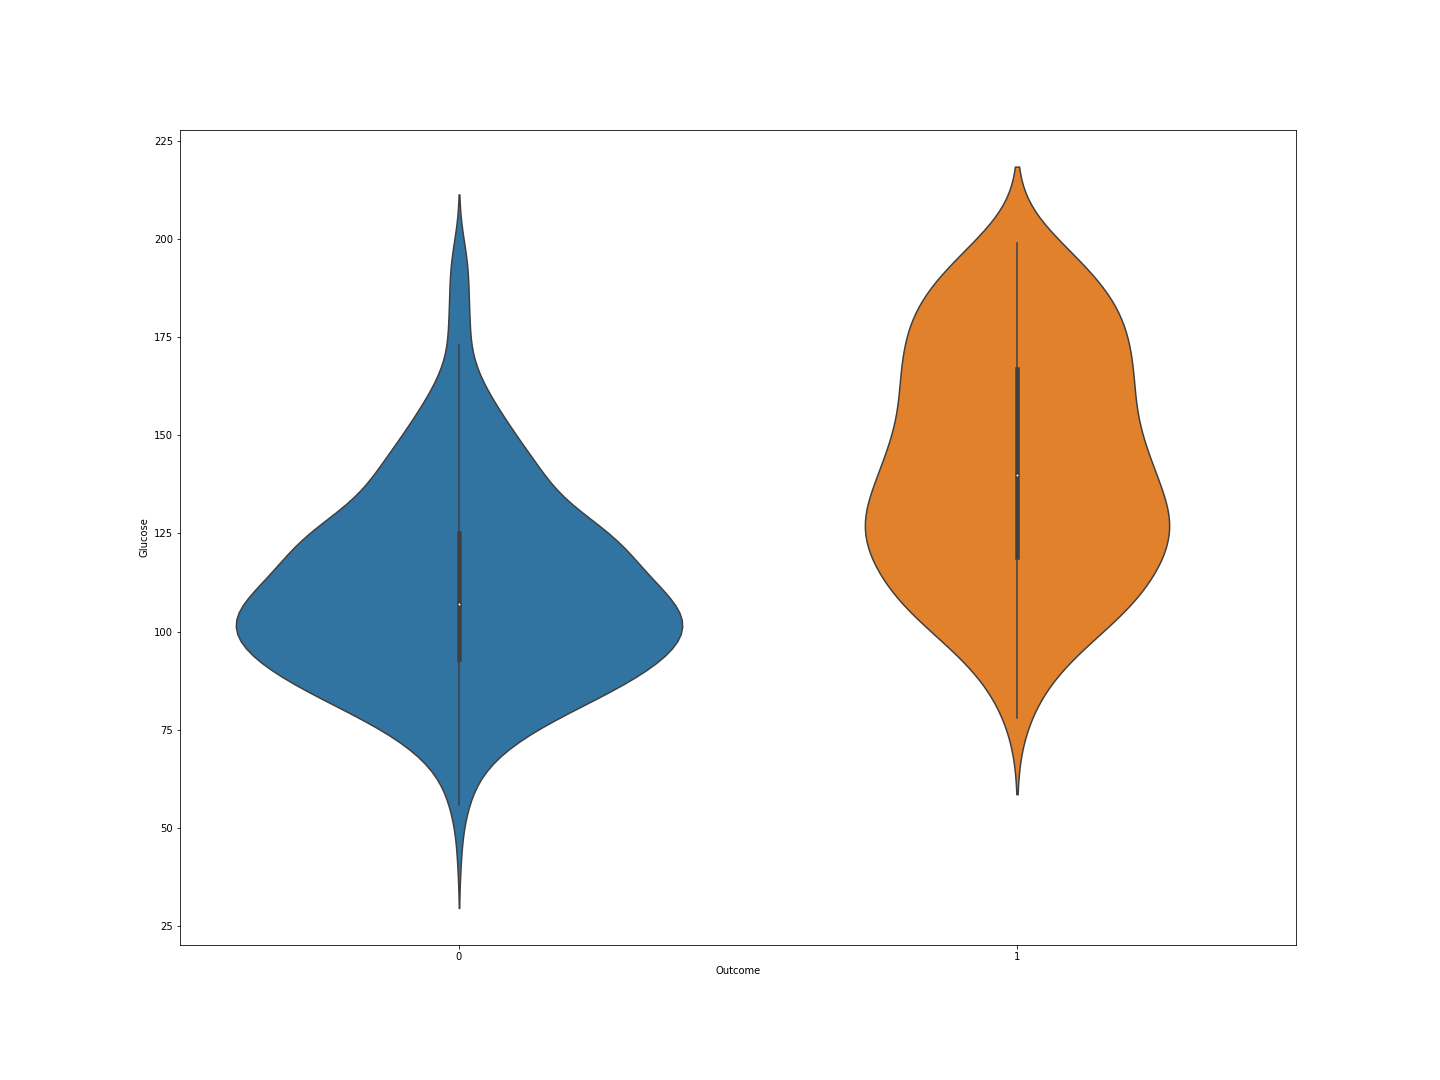

In [ ]:
corr_Pearson = diabetes_copy.corr(method='pearson')

figure = plt.figure(figsize=(25,15))
sns.heatmap(corr_Pearson,vmin=-1,vmax=+1,cmap='Blues',annot=True, 
            linewidths=1,linecolor = 'white')
plt.title('Pearson Correlation')
plt.show()

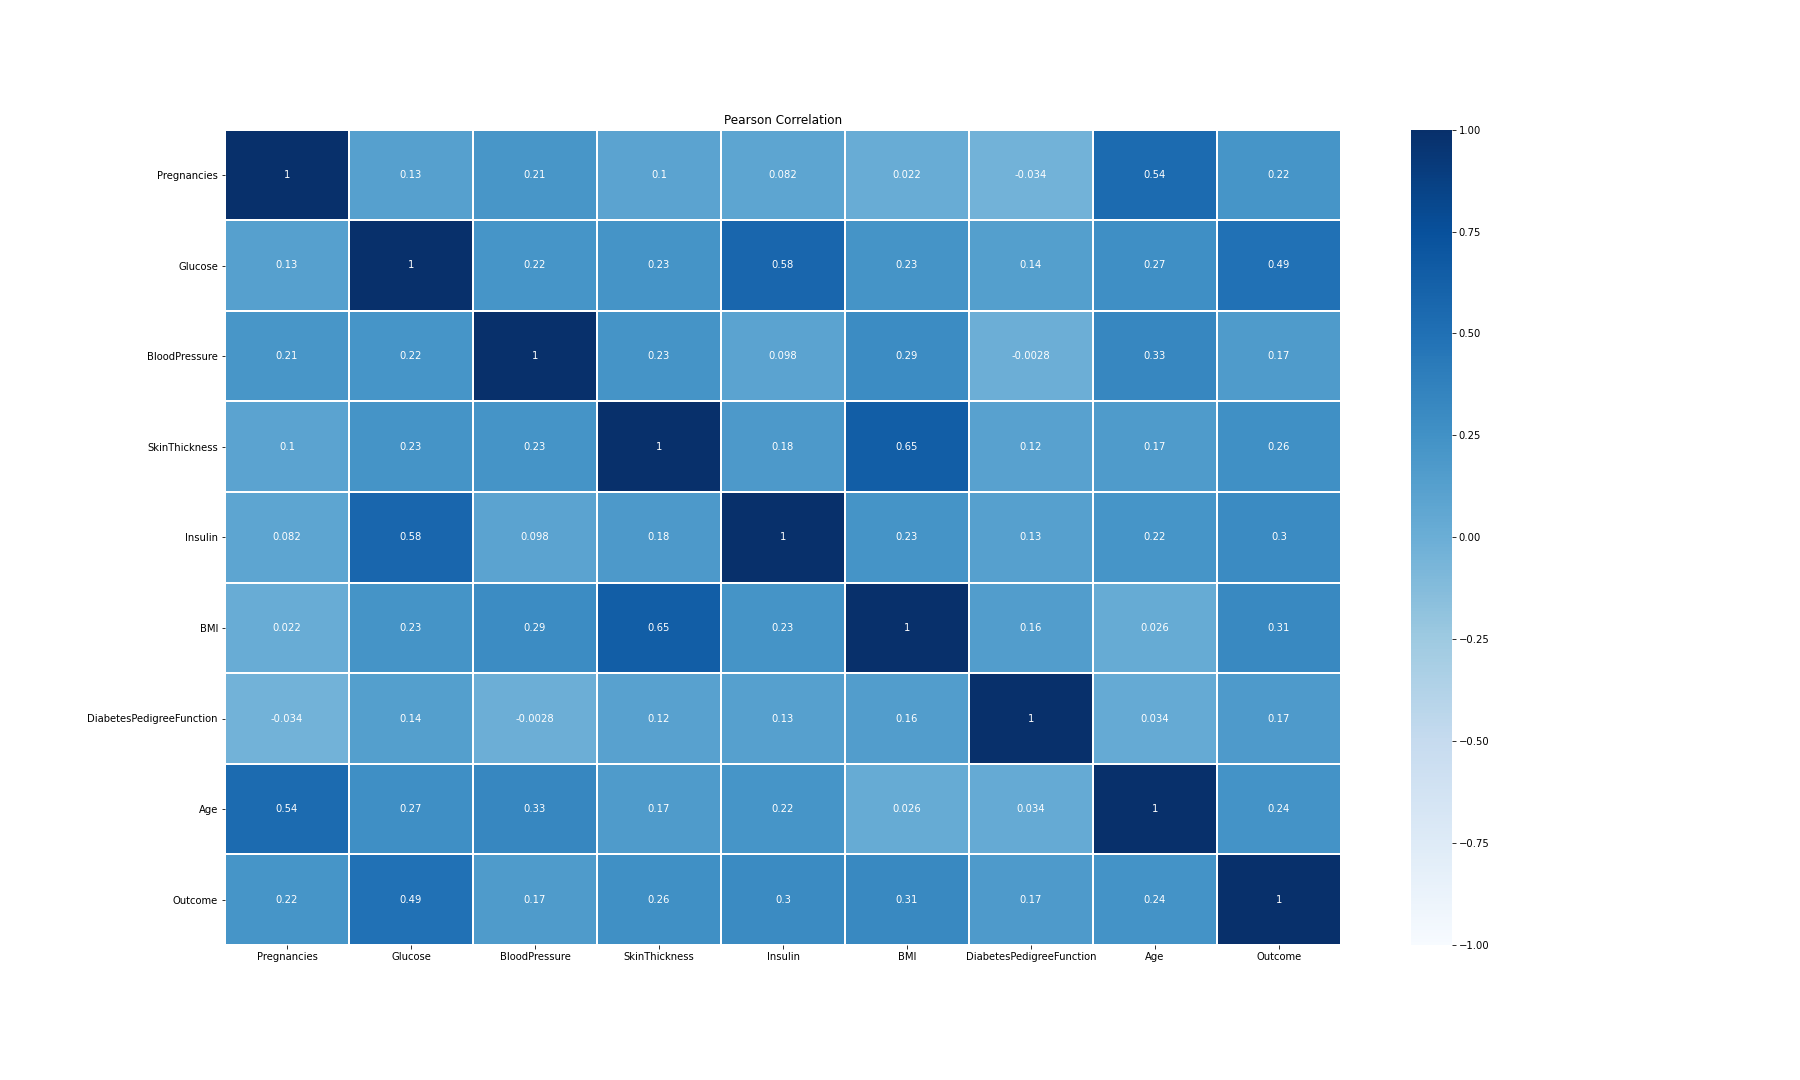

In [ ]:
data_x= data.drop(labels=['Outcome'],axis=1,inplace=False)

x_train, x_test, y_train, y_test = train_test_split(data_x,data_y,
                        test_size = 0.3, random_state = 44, shuffle = True)


Logistic_R = LogisticRegression(solver="liblinear").fit(x_train,y_train)
Decision_Tree = DecisionTreeClassifier(random_state=44).fit(x_train,
                                                            y_train)


Logistic_R_Pre = Logistic_R.predict(x_test)
logis_accuracy = accuracy_score(y_test,Logistic_R_Pre)

Decision_Tree_Pre = Decision_Tree.predict(x_test)
Tree_accuracy = accuracy_score(y_test,Decision_Tree_Pre)

print('Logistic Regression Model: ',round(logis_accuracy,2))
print('Decision Tree Model: ',round(Tree_accuracy,2))

Logistic Regression Model:  0.78
Decision Tree Model:  0.72